In [89]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
import scipy.stats as stats
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import preprocessing

In [96]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
#данная строчка нужна для корректного отображения графиков
%matplotlib inline 

In [2]:
df = pd.read_csv('Задание_2_test_cluster.csv', encoding='cp1251', sep=';')

# 1. Предобработка данных

In [3]:
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [5]:
# Избавимся от строк с пропусками в столбце gender
df.dropna(subset=['gender'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
# Преобразуем пол в 0 и 1
gender_enc = LabelEncoder()
df.loc[:, 'gender'] = gender_enc.fit_transform(df.loc[:, 'gender'])
#gender_enc.inverse_transform(df['gender'])

In [7]:
# Дропнем столбец с большим числом пропусков и отсутвием описания
df.drop(['loan_to_deposit'], axis=1, inplace=True)

In [8]:
# Предполагая, что пропуски в столбце "средний размер транзакции" несут смысл отсутствия транзакций заменим их на 0
df['Avg_trx'].fillna(0, inplace=True)

In [9]:
# Так же заменим пропуски на 0 в столбце avgtrx_to_balance и nbi
df['avgtrx_to_balance'].fillna(0, inplace=True)
df['nbi'].fillna(0, inplace=True)

In [10]:
df.sample(5)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,avg_td_balance_1Y,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,Avg_trx,avgtrx_to_balance,nbi
23777,63,1,500-1000,19,0.0,0.0,0.0,0.0,70.00,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,108.938082
31882,68,0,100-500,78,0.0,0.0,0.0,0.0,78821.81,98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2328.428571,0.023730,10021.585825
3713,39,0,<100,1,0.0,0.0,0.0,0.0,0.00,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
9133,28,0,<100,29,0.0,0.0,0.0,0.0,0.89,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,30.987626
46120,31,0,100-500,34,0.0,0.0,0.0,0.0,14.40,85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1428.098941,69.558742,98.259791


# 2. Распределение данных

In [11]:
df.ml_balance.value_counts().head(5)

0.00          48706
1910831.13        1
350150.28         1
411000.97         1
333075.75         1
Name: ml_balance, dtype: int64

In [12]:
df.cl_balance_0m.value_counts().head(5)

0.00          41070
1000000.00       17
558659.22         5
500000.00         5
446927.37         4
Name: cl_balance_0m, dtype: int64

In [13]:
df.loan_balance_0m.value_counts().head(5)

0.0          38156
1000000.0       13
600000.0         7
500000.0         6
100000.0         6
Name: loan_balance_0m, dtype: int64

In [14]:
df.td_balance_0m.value_counts().head(5)

0.0          46524
500000.0       124
1000000.0      113
3500.0         110
1300000.0       73
Name: td_balance_0m, dtype: int64

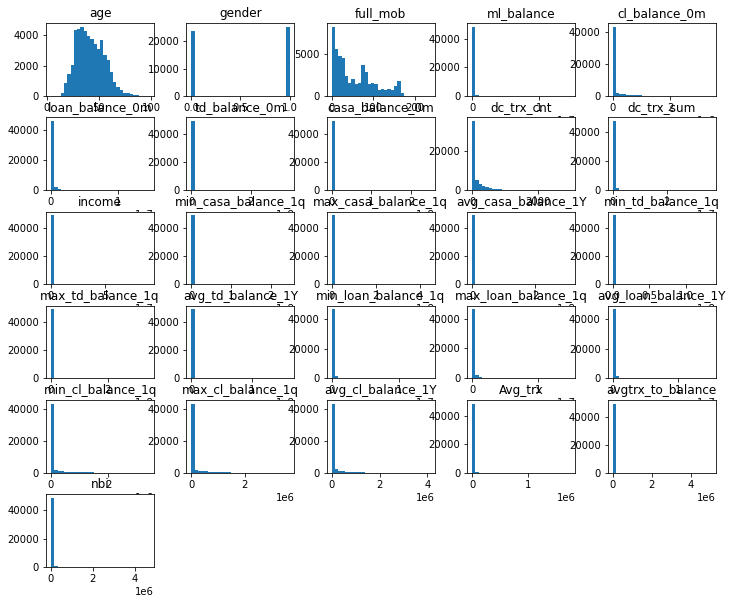

In [15]:
df.hist(bins = 30, figsize = (12,10), grid = False)
plt.show()

- Во многих столбцах большинство значений равны нулю

## 2.1 Вычисление кореляции  между непрерывными переменными

Важно обратить внимание на распределение исследуемых признаков. Большинство из них, из-за обилия нулевых значений, распределены не по нормальному закону, что можно подтвердить тестом Шапиро-Уилка на нормальность

In [16]:
print('nbi -', stats.shapiro(df['nbi'].sample(5000)))
print('dc_trx_sum -', stats.shapiro(df['dc_trx_sum'].sample(5000)))
print('avg_casa_balance_1Y -', stats.shapiro(df['avg_casa_balance_1Y'].sample(5000)))
print('avg_cl_balance_1Y -', stats.shapiro(df['avg_cl_balance_1Y'].sample(5000)))

nbi - ShapiroResult(statistic=0.15353864431381226, pvalue=0.0)
dc_trx_sum - ShapiroResult(statistic=0.36708253622055054, pvalue=0.0)
avg_casa_balance_1Y - ShapiroResult(statistic=0.017234325408935547, pvalue=0.0)
avg_cl_balance_1Y - ShapiroResult(statistic=0.3644559979438782, pvalue=0.0)


Поэтому будем использовать ранговую корреляцию Спирмана

Так же в данных имеются категориальные признаки `gender` и `city_type`. Их корреляцию с непрерывнами признаками стоит рассматривать отдельно

In [17]:
numeric = df.drop(['gender', 'city_type'], axis=1)

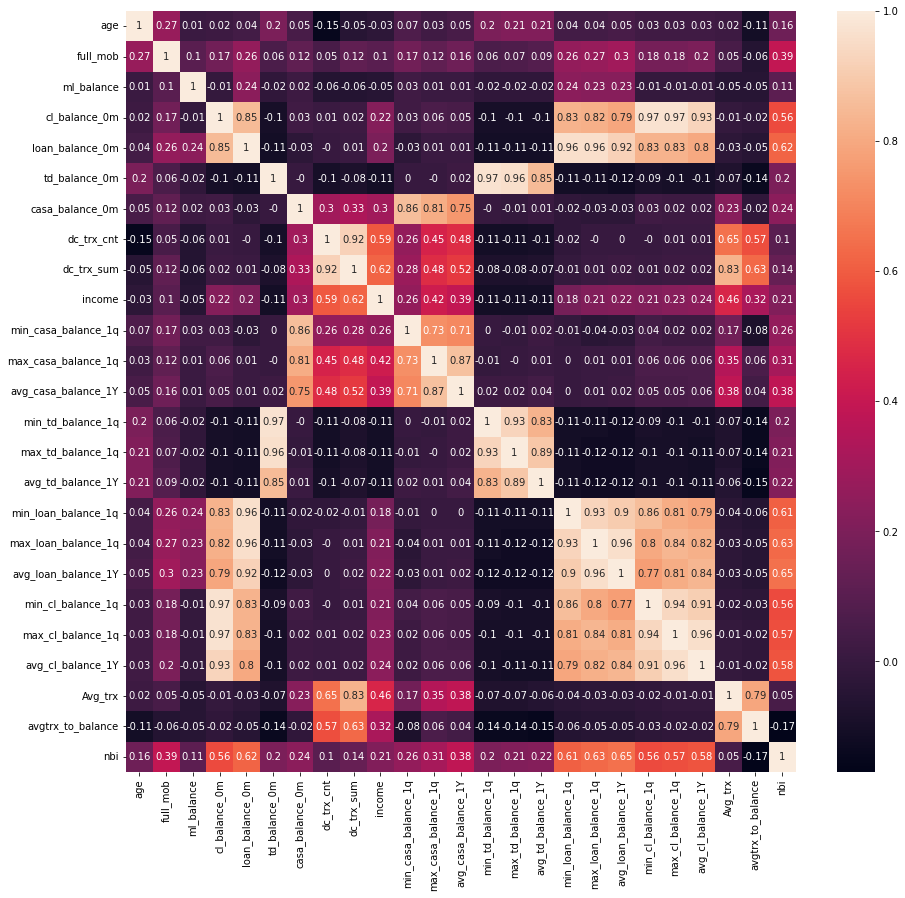

In [18]:
plt.figure(figsize=(15, 14))
sns.heatmap(numeric.corr(method='spearman').round(decimals=2), annot=True)
plt.show()

- Признаки Avg_trx, avgtrx_to_balance почти не коррелируют с другими столбцами. Аналогично dc_trx_cnt, dc_trx_sum. Оставим `dc_trx_sum` из-за наличия у него слабой корелляции с nbi
- Признаки age и full_mob коррелируют друг с другом, что кажется интуитивно понятным: возраст человека связан с тем как долго он может являться клиентом банка

- Столбцы min_loan_balance_1q, max_loan_balance_1q, avg_loan_balance_1Y вероятно описывают, как и loan_balance_0m, кредиты. Столбцы min_cl_balance_1q, max_cl_balance_1q, avg_cl_balance_1Y вероятно описывают, как и cl_balance_0m, потребительский кредит. Для сокращения дублирующей информации оставим только `avg_loan_balance_1Y`
- Столбцы min_td_balance_1q, max_td_balance_1q, avg_td_balance_1Y вероятно описывают, как и td_balance_0m, депозиты. Будем использовать `avg_td_balance_1Y`
- Столбцы min_casa_balance_1q, max_casa_balance_1q, avg_casa_balance_1Y вероятно описывают, как и casa_balance_0m, счета. Оставим `avg_casa_balance_1Y`

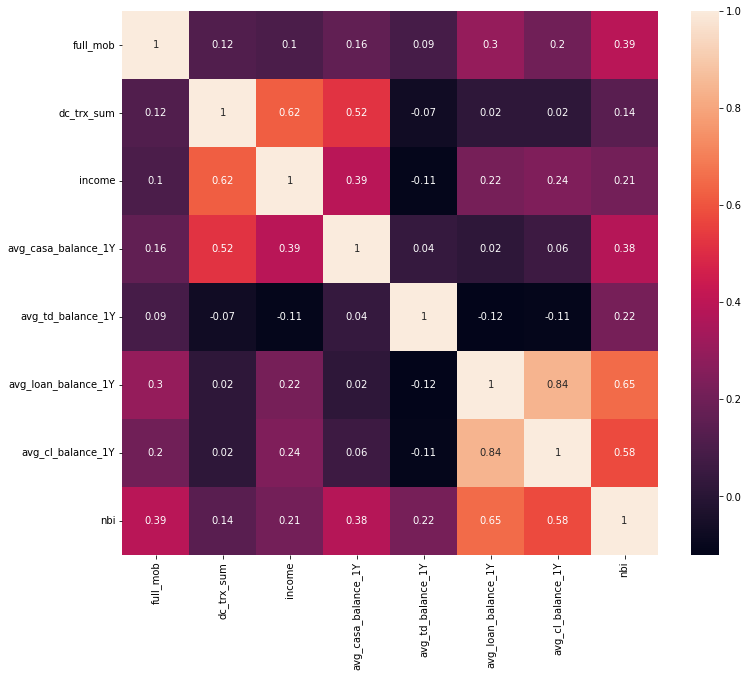

In [19]:
# Создадим список drop с неиспользуемыми столбцами
drop = ['gender', 'city_type', 'Avg_trx', 'avgtrx_to_balance', 'age',
       'min_cl_balance_1q', 'max_cl_balance_1q', 'cl_balance_0m', 'dc_trx_cnt', 'min_loan_balance_1q',
       'max_loan_balance_1q', 'loan_balance_0m', 'min_td_balance_1q', 'max_td_balance_1q',
       'td_balance_0m', 'min_casa_balance_1q', 'max_casa_balance_1q', 'casa_balance_0m', 'ml_balance']

plt.figure(figsize=(12, 10))
sns.heatmap(df.drop(drop, axis=1).corr(method='spearman').round(decimals=2), annot=True)
plt.show()

- Как видно столбцы avg_loan_balance_1Y и avg_cl_balance_1Y сильно коррелируют друг с другом поэтому оставим `avg_loan_balance_1Y` так как он сильнее коррелирует с `nbi`

- income коррелирует с dc_trx_sum. Оставим income по той же причине

In [20]:
# Создадим датафрейм с отобранными столбцами
drop = ['gender', 'city_type', 'Avg_trx', 'avgtrx_to_balance', 'age',
       'min_cl_balance_1q', 'max_cl_balance_1q', 'cl_balance_0m', 'dc_trx_cnt', 'min_loan_balance_1q',
       'max_loan_balance_1q', 'loan_balance_0m', 'min_td_balance_1q', 'max_td_balance_1q',
       'td_balance_0m', 'min_casa_balance_1q', 'max_casa_balance_1q', 'casa_balance_0m', 'ml_balance',
       'avg_cl_balance_1Y', 'dc_trx_sum']

sorted_df = df.drop(drop, axis=1)

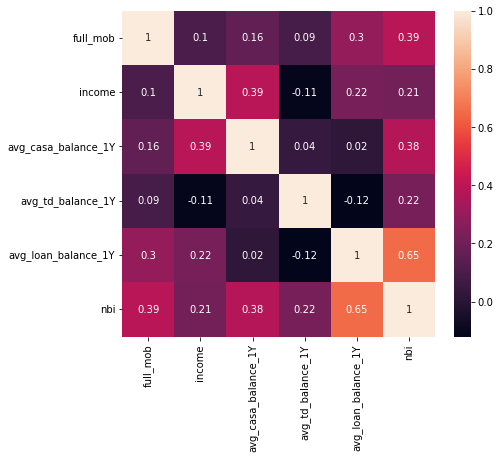

In [21]:
plt.figure(figsize=(7, 6))
sns.heatmap(sorted_df.corr(method='spearman').round(decimals=2), annot=True)
plt.show()

## 2.2 Корреляция между отобранными переменными и категориальными признаками

### 2.2.1 Пол

In [22]:
df.columns

Index(['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income', 'min_casa_balance_1q', 'max_casa_balance_1q',
       'avg_casa_balance_1Y', 'min_td_balance_1q', 'max_td_balance_1q',
       'avg_td_balance_1Y', 'min_loan_balance_1q', 'max_loan_balance_1q',
       'avg_loan_balance_1Y', 'min_cl_balance_1q', 'max_cl_balance_1q',
       'avg_cl_balance_1Y', 'Avg_trx', 'avgtrx_to_balance', 'nbi'],
      dtype='object')

In [23]:
#В случае бинарного категориального признака и числового признака мы можем применить бисериальный коэффициент корреляции
print('full_mob - gender:', pointbiserialr(df['gender'], df['full_mob']))
print('income - gender:', pointbiserialr(df['gender'], df['income']))
print('avg_casa_balance_1Y - gender:', pointbiserialr(df['gender'], df['avg_casa_balance_1Y']))
print('avg_td_balance_1Y - gender:', pointbiserialr(df['gender'], df['avg_td_balance_1Y']))
print('max_loan_balance_1q - gender:', pointbiserialr(df['gender'], df['max_loan_balance_1q']))
print('nbi - gender:', pointbiserialr(df['gender'], df['nbi']))

full_mob - gender: PointbiserialrResult(correlation=-0.02099853650144498, pvalue=3.1354754021196796e-06)
income - gender: PointbiserialrResult(correlation=0.007584705976094033, pvalue=0.09224611032377023)
avg_casa_balance_1Y - gender: PointbiserialrResult(correlation=0.010979733448511983, pvalue=0.01479578701923703)
avg_td_balance_1Y - gender: PointbiserialrResult(correlation=0.0015245322396847392, pvalue=0.7350514267325595)
max_loan_balance_1q - gender: PointbiserialrResult(correlation=0.05141785338491828, pvalue=3.276103237110668e-30)
nbi - gender: PointbiserialrResult(correlation=0.04031995301429236, pvalue=3.4342713042927383e-19)


- При взятом по умолчанию уровне значимости 0.05 `income` и `avg_td_balance_1Y` значимо коррелируют с `gender`, но сила корреляции очень маленькая

In [24]:
# Средний баланс за год с группировкой по полу
df.groupby('gender')['avg_td_balance_1Y'].mean()

gender
0    69501.708681
1    72919.207147
Name: avg_td_balance_1Y, dtype: float64

In [25]:
# Средний доход с группировкой по полу
df.groupby('gender')['income'].mean()

gender
0    22060.150389
1    28715.622065
Name: income, dtype: float64

In [26]:
# 0 - женщины, 1 - мужчины
gender_enc.inverse_transform([0, 1])

array(['F', 'М'], dtype=object)

### 2.2.1 Население города

In [27]:
df['city_type'].value_counts()

<100        15211
100-500     10660
Mega         8633
1M+          7847
500-1000     6926
Name: city_type, dtype: int64

- Чтобы оценить корреляцию у признака city_type, имеющего много классов, применим к нему onehotencoding преобразование

In [28]:
citys = pd.get_dummies(df['city_type'])
citys.head()

,100-500,1M+,500-1000,<100,Mega
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,1,0,0,0


In [29]:
# Корреляция спирмана для отобранных признаков и численностью населения городов
for i in sorted_df.columns:
    for j in citys.columns:
        corr = pointbiserialr(sorted_df[i], citys[j])
        if corr[1] > 0.05:
            print(f'{i} - {j}:', corr)

full_mob - 500-1000: PointbiserialrResult(correlation=-0.0012103935477433161, pvalue=0.7881747379868728)
income - 100-500: PointbiserialrResult(correlation=-0.001764771142688571, pvalue=0.6952490480379525)
income - 1M+: PointbiserialrResult(correlation=-0.0056195145685454875, pvalue=0.21224286288542857)
income - 500-1000: PointbiserialrResult(correlation=-0.00021607969233084726, pvalue=0.9617440816849592)
income - <100: PointbiserialrResult(correlation=0.0027820550070507604, pvalue=0.5368668181375792)
income - Mega: PointbiserialrResult(correlation=0.004137375060810293, pvalue=0.35840286280161016)
avg_casa_balance_1Y - 100-500: PointbiserialrResult(correlation=-0.007508220747743107, pvalue=0.09557649228170997)
avg_casa_balance_1Y - 1M+: PointbiserialrResult(correlation=0.008769518429581999, pvalue=0.05157276602753076)
avg_casa_balance_1Y - 500-1000: PointbiserialrResult(correlation=-0.00664304132828413, pvalue=0.14031223314935976)
avg_td_balance_1Y - 100-500: PointbiserialrResult(corre

Среди значимых корреляций (Альфа > 0.05) все имеют слабую силу

### 2. 3 Промежуточные выводы

На доход от клиента больше всего влияют такие признаки как: 
- Длительность взаимоотношений клиента с банком (full_mob)
- Доход клиента (income)
- Показатели по счетам клиента (avg_casa_balance_1Y)
- Размер депозита клиента (avg_td_balance_1Y)
- Размер кредита клиента (avg_loan_balance_1Y)

- Пол и размер города в котором живет клиент слабо влияют на доход от него

# 3. Разделение клиентов на группы

In [55]:
# Создадим на основе nbi бинарный столбец, где 1 - доход больше медианного значения, а 0 - меньше
sorted_df['nbi_classes'] = (df['nbi'] > sorted_df['nbi'].median()).apply(int)

In [56]:
# Итоговый датасет
sorted_df.head()

,full_mob,income,avg_casa_balance_1Y,avg_td_balance_1Y,avg_loan_balance_1Y,nbi,nbi_classes
0,50,0.00,93131.782817,0.0,0.000000,2433.644326,1
1,154,22100.00,893.147500,0.0,38051.374167,6065.052515,1
2,165,36694.37,5844.510000,70000.0,43218.413333,8009.940315,1
3,40,1293.60,217.270833,0.0,0.000000,684.233442,0
4,3,44169.00,19043.322500,0.0,0.000000,157.694118,0


## 3.1 Решающие деревья

In [57]:
# Разобьем данные на группы для дальнейшего обучения
X = sorted_df[['full_mob', 'income', 'avg_casa_balance_1Y', 'avg_td_balance_1Y', 'avg_loan_balance_1Y']]
y = sorted_df['nbi_classes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [62]:
# Обучим классификатор и выведем точность предсказаний
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_leaf=1000)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.87879


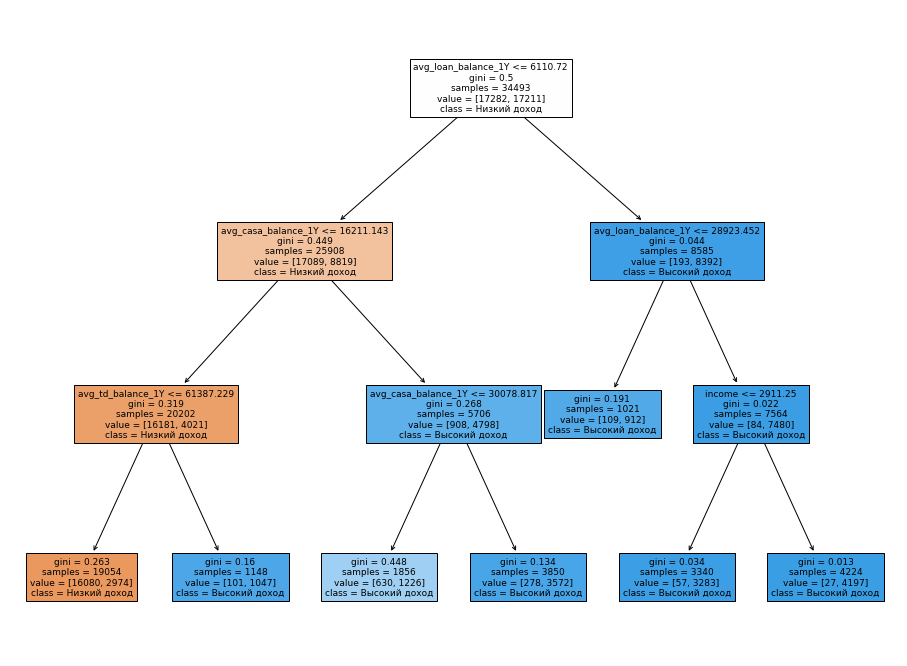

In [78]:
# Отобразим дерево
plt.figure(figsize=(16,12))
tree.plot_tree(clf, feature_names=list(X),
               class_names=['Низкий доход', 'Высокий доход'],
               filled=True,
              fontsize=9);

<b>Выводы:</b>
- Размер кредита клиента (avg_loan_balance_1Y) больше всего влияет на доход с клиента. И чем кредит больше тем больше доход банка.
- Наименее доходная группа клиентов это люди имеющие маленький размер кредита (или не имеющие кредита вовсе), имеющие низкие показатели по счетам (avg_casa_balance_1Y) и маленький депозит(avg_td_balance_1Y)

## 3.2 K-Means

In [87]:
sorted_df.iloc[:, :-1].head(1)

,full_mob,income,avg_casa_balance_1Y,avg_td_balance_1Y,avg_loan_balance_1Y,nbi
0,50,0.0,93131.782817,0.0,0.0,2433.644326


In [88]:
# Приведем данные к нормальным значениям
dataNorm = preprocessing.MinMaxScaler().fit_transform(sorted_df.iloc[:, :-1].values)

In [94]:
# Вычислим расстояния между каждым набором данных
data_dist = pdist(dataNorm, 'euclidean')
data_linkage = linkage(data_dist, method='average')

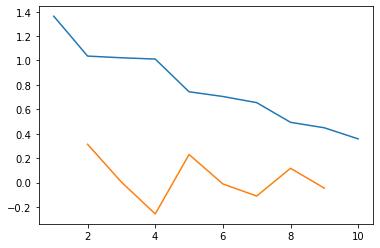

Рекомендованное количество кластеров: 2


In [95]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

Тем не менее попробуем большее число кластеров (5)

In [157]:
# строим кластеризаци методом KMeans
km = KMeans(n_clusters=5).fit(dataNorm)

In [158]:
col = ['full_mob', 'income', 'avg_casa_balance_1Y', 'avg_td_balance_1Y', 'avg_loan_balance_1Y', 'nbi']

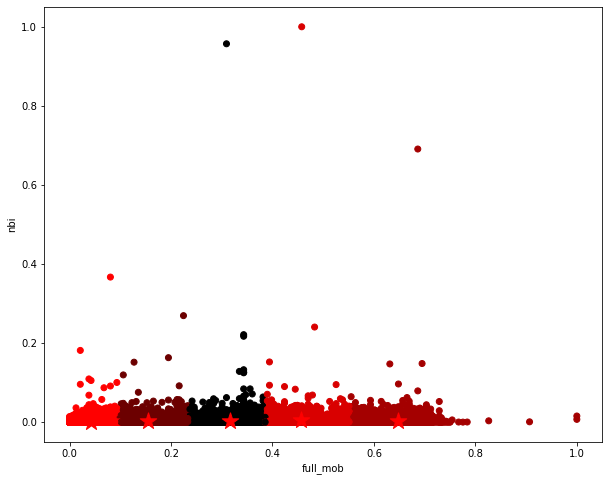

In [160]:
x=0 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=5 #
centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='r', label='centroid')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [161]:
# к оригинальным данным добавляем номера кластеров
sorted_df['KMeans'] = km.labels_ + 1
res = sorted_df.groupby('KMeans')[col].mean()
res['Количество'] = sorted_df.groupby('KMeans').size().values
res

,full_mob,income,avg_casa_balance_1Y,avg_td_balance_1Y,avg_loan_balance_1Y,nbi,Количество
KMeans,,,,,,,
1,9.941157,20417.687491,38908.736827,50062.968042,36379.518169,5655.830358,18354
2,107.679473,33209.371879,117690.293868,126800.020378,160041.105323,20851.583135,5388
3,152.711276,31127.985240,63101.064527,65497.131989,130245.371937,17362.153709,4984
4,36.257598,20634.003532,44097.363009,55295.802499,64304.983672,9991.221671,10299
5,74.757413,32656.765995,103243.076859,98875.049863,105332.840325,15613.791781,10252


<b>Выводы:</b>
- Выделяется кластер в строке два. Доходы от этих клиентов наибольшие, что обуславливается выделенными ранее признаками (income, avg_casa_balance_1Y, avg_td_balance_1Y, avg_loan_balance_1Y)
- Так же можно присмотреться к кластеру в строке 1 как к наименее доходной для банка категории клиентов. Но низкая доходность может быть обусловлена небольшой длительностью взаимоотношени с этими клиентами (full_mob).


# 4. Итоговые выводы

Наиболее важные признаки для оценки дохода с клиента:

- Длительность взаимоотношений клиента с банком (full_mob)
- Доход клиента (income)
- Показатели по счетам клиента (avg_casa_balance_1Y)
- Размер депозита клиента (avg_td_balance_1Y)
- Размер кредита клиента (avg_loan_balance_1Y)

- Размер кредита клиента (avg_loan_balance_1Y) больше всего влияет на доход с клиента. И чем кредит больше тем больше доход банка.
- Наименее доходная группа клиентов это люди имеющие маленький размер кредита (или не имеющие кредита вовсе), имеющие низкие показатели по счетам (avg_casa_balance_1Y) и маленький депозит(avg_td_balance_1Y)

- Выделяется кластер клиентов с высокими показателями признаков (income, avg_casa_balance_1Y, avg_td_balance_1Y, avg_loan_balance_1Y). Клиенты этого кластера приносят наибольший доход